---
title: "filtering"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

Let's say we have a signal with some noise that we want to filter out. How would we do that using Fourier transforms?

In [1]:
#| code-summary: "import stuff"
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
import math
import scipy
# %matplotlib widget

In [2]:
#| code-fold: false
dt = 0.02
time = np.arange(0,100,dt)
N = len(time)
period = 5
signal = np.sin(2.0*np.pi*time/period) + 0.5 * (np.random.random(N)-0.5)

fft = scipy.fft.fft(signal)
xi = scipy.fft.fftfreq(N, dt)

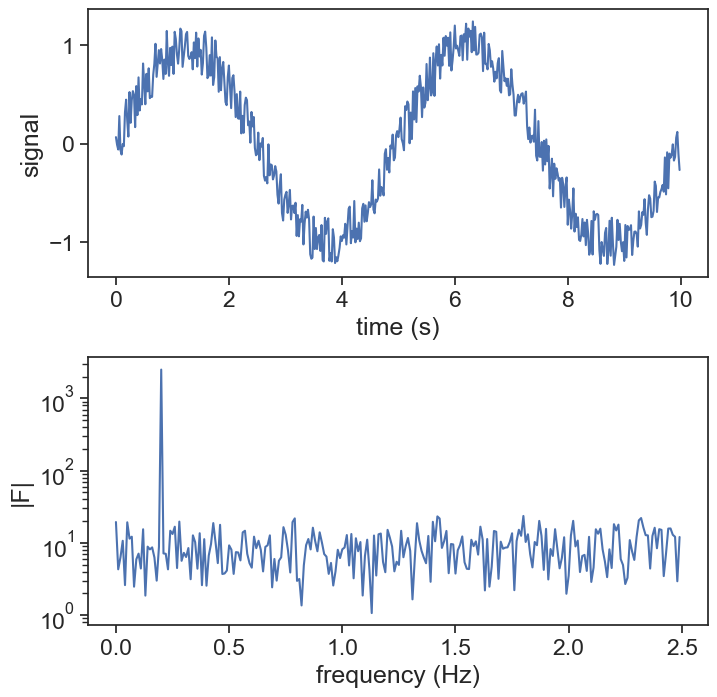

In [80]:
#| code-summary: "show signal and its power spectrum"
fig, ax = plt.subplots(2, 1, figsize=(8,8))
fig.subplots_adjust(hspace=0.30)
ax[0].plot(time[:N//10], signal[:N//10])
ax[1].plot(xi[:N//20], np.abs(fft[:N//20]))
ax[1].set_yscale('log')
ax[0].set(xlabel="time (s)",
          ylabel="signal")
ax[1].set(xlabel="frequency (Hz)",
          ylabel="|F|");

We can get rid of the fast variations in the signal by eliminating all high frequencies in the Fourier transform. The simplest way to do that is determining a cut-off frequency, and zeroing out the Fourier transform corresponding to frequencies higher than the cut off.

::: {.column-margin}
Also eliminate frequencies lower than negative cut off! This is important!
:::

In [9]:
#| code-fold: false
cutoff = 1.0
# apply low pass filter
mask = np.where( (xi>cutoff) | (xi<-cutoff) )
fft_filtered = fft.copy()
fft_filtered[mask] = 0.0
# reconstitute signal using inverse Fourier transform
signal_filtered = np.fft.ifft(fft_filtered)

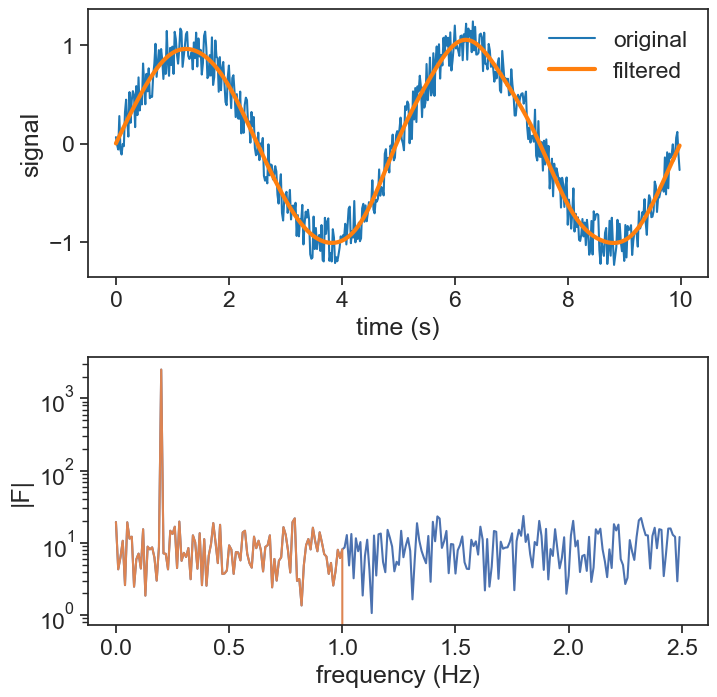

In [81]:
#| code-summary: "original vs. filtered"
fig, ax = plt.subplots(2, 1, figsize=(8,8))
fig.subplots_adjust(hspace=0.30)
ax[0].plot(time[:N//10], signal[:N//10], color="tab:blue", label="original")
ax[0].plot(time[:N//10], signal_filtered[:N//10], color="tab:orange", lw=3, label="filtered")
ax[0].legend(frameon=False)
ax[0].set(xlabel="time (s)",
          ylabel="signal")

ax[1].plot(xi[:N//20], np.abs(fft[:N//20]))
ax[1].plot(xi[:N//20], np.abs(fft_filtered[:N//20]))

ax[1].set(xlabel="frequency (Hz)",
          ylabel="|F|");
ax[1].set_yscale('log');

We applied above a "low pass" filter, because we let all the low frequencies pass, and eliminated the higher frequencies.
Within signal processing, there are four primary types of filters commonly employed, each serving a unique purpose in shaping the signal's characteristics.

1. **Lowpass Filter**: A lowpass filter allows signals with a frequency lower than a certain cutoff frequency to pass through while attenuating (reducing) the components of the signal that have frequencies higher than this cutoff frequency. It's used to remove high-frequency noise or to extract the low-frequency components of a signal.

1. **Highpass Filter**: A highpass filter does the opposite of a lowpass filter. It allows signals with a frequency higher than a certain cutoff frequency to pass while attenuating signals with frequencies lower than the cutoff frequency. This type of filter is useful for removing low-frequency noise or to isolate high-frequency components.

1. **Bandpass Filter**: A bandpass filter allows signals within a certain frequency range (between a lower and an upper cutoff frequency) to pass through while attenuating signals outside this range. It's used to isolate a specific frequency band from a broader spectrum of frequencies.

1. **Bandstop Filter (Notch Filter)**: A bandstop filter, also known as a notch filter, attenuates signals within a specific frequency range while allowing signals outside this range to pass through relatively unaffected. This type of filter is useful for eliminating unwanted frequencies or noise from a signal without significantly affecting the other components of the signal.

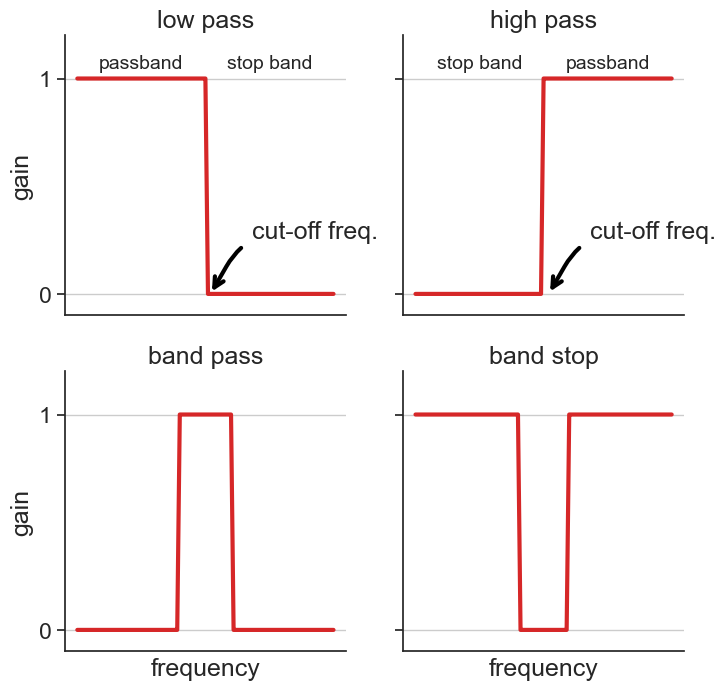

In [6]:
#| code-summary: "ideal filter responses"
fig, ax = plt.subplots(2, 2, figsize=(8,8), sharex=True, sharey=True)

fr = np.linspace(0,10,101)

plot_dict = {'lw':3, 'color':'tab:red'}

# panel (0,0)
cutoff_lp = 5.0
gain_lp = np.ones_like(fr)
mask = np.where(fr>cutoff_lp)
gain_lp[mask] = 0.0
ax[0,0].plot(fr, gain_lp, **plot_dict)
ax[0,0].text(2.5,1.05, "passband", ha="center", fontsize=14)
ax[0,0].text(7.5,1.05, "stop band", ha="center", fontsize=14)

# panel (0,1)
cutoff_hp = 5.0
gain_hp = np.ones_like(fr)
mask = np.where(fr<cutoff_hp)
gain_hp[mask] = 0.0
ax[0,1].plot(fr, gain_hp, **plot_dict)
ax[0,1].text(2.5,1.05, "stop band", ha="center", fontsize=14)
ax[0,1].text(7.5,1.05, "passband", ha="center", fontsize=14)

cutoff_1 = 4.0
cutoff_2 = 6.0
gain_bp = np.ones_like(fr)
mask = np.where( (fr<cutoff_1) | (fr>cutoff_2) )
gain_bp[mask] = 0.0
ax[1,0].plot(fr, gain_bp, **plot_dict)

gain_bs = np.ones_like(fr)
mask = np.where( (fr>cutoff_1) & (fr<cutoff_2) )
gain_bs[mask] = 0.0
ax[1,1].plot(fr, gain_bs, **plot_dict)

ax[0,0].set(ylabel="gain",
            ylim=[-0.1, 1.2],
            yticks=[0,1],
            xticks=[],
            title = "low pass")
ax[0,1].set(title = "high pass")
ax[1,0].set(ylabel="gain",
            xlabel="frequency",
            title = "band pass"
            )
ax[1,1].set(xlabel="frequency",
            title = "band stop"
            )

ax[0,0].spines[['right', 'top']].set_visible(False)
ax[0,1].spines[['right', 'top']].set_visible(False)
ax[1,0].spines[['right', 'top']].set_visible(False)
ax[1,1].spines[['right', 'top']].set_visible(False)
ax[0,0].grid()
ax[0,1].grid()
ax[1,0].grid()
ax[1,1].grid()

ax[0,0].annotate(
    "cut-off freq.",
    xy=(cutoff_lp+0.2, 0),  xycoords='data',
    xytext=(30, 40), textcoords='offset points',
    bbox=dict(boxstyle="round4,pad=.5", fc="white"),
    arrowprops=dict(arrowstyle="->",
                    color="black", lw=3,
                    connectionstyle="angle,angleA=0,angleB=60,rad=40"))

ax[0,1].annotate(
    "cut-off freq.",
    xy=(cutoff_hp+0.2, 0),  xycoords='data',
    xytext=(30, 40), textcoords='offset points',
    bbox=dict(boxstyle="round4,pad=.5", fc="white"),
    arrowprops=dict(arrowstyle="->",
                    color="black", lw=3,
                    connectionstyle="angle,angleA=0,angleB=60,rad=40"));

## decibels

It is quite easy to apply a low pass filter as in the figure above, but that introduces problems down the road (more on that later).
Usually, softer functions are used as filters, such as the ubiquitous **first-order low pass frequency response**:

$$
\text{Gain} = \frac{1}{\sqrt{1+(\xi/\xi_c)^2}}
$$

::: {.column-margin}
For example, this appears as the response of a simple [RC electric circuit](https://en.wikipedia.org/wiki/RC_circuit#Series_circuit). Also, this is a particular instance of the [Butterworth filter](https://en.wikipedia.org/wiki/Butterworth_filter) (order $n=1$).
:::

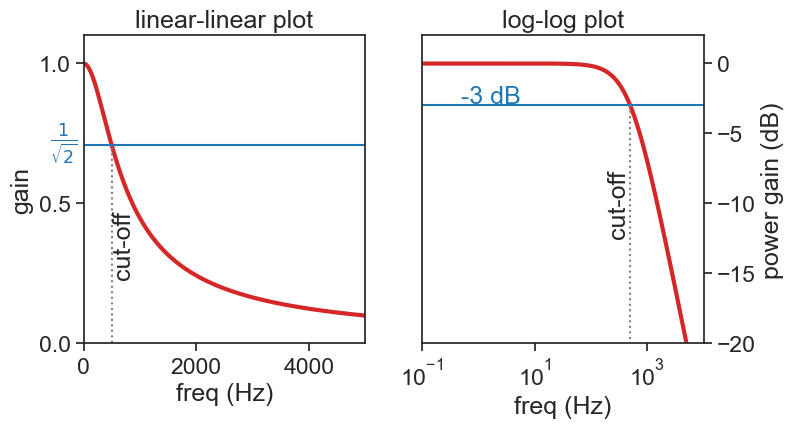

In [83]:
#| code-summary: "first-order low pass filter, gain response"
fig, ax = plt.subplots(1, 2, figsize=(8,4))

fr = np.linspace(0,5000,1001)
plot_dict = {'lw':3, 'color':'tab:red'}
cutoff_lp = 500.0
H = 1 / np.sqrt(1.0 + (fr/cutoff_lp)**2)
dB = 20.0 * np.log10(H)
ax[0].plot(fr, H, **plot_dict)
ax[0].set(xlim=[fr.min(), fr.max()],
          ylim=[0,1.1],
          yticks=[0,0.5,1.0],
          xlabel="freq (Hz)",
          ylabel="gain",
          title="linear-linear plot")
xlim_lin = ax[0].get_xlim()
ax[0].plot(xlim_lin, [1/np.sqrt(2)]*2, color="tab:blue")
ax[0].text(-100, 1/np.sqrt(2), r"$\frac{1}{\sqrt{2}}$", ha="right", color="tab:blue")
ax[0].text(cutoff_lp, 0.5/np.sqrt(2), "cut-off", rotation="vertical", ha="left", va="center")
ax[0].plot([cutoff_lp]*2, [0, 1/np.sqrt(2)], color="tab:gray", ls=":")
# ax[0].grid()


ax[1].plot(fr, dB, **plot_dict)
ax[1].set_xscale("log")
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
ax[1].set(ylabel="power gain (dB)",
          xlabel="freq (Hz)",
          xlim=[1e-1,1e4],
          ylim=[-20,2],
          title="log-log plot")
# ax[1].grid()
xlim_log = ax[1].get_xlim()
ax[1].plot(xlim_log, [-3]*2, color="tab:blue")
ax[1].text(0.5, -3+0.2, "-3 dB", color="tab:blue")
ax[1].text(cutoff_lp, -10, "cut-off", rotation="vertical", ha="right", va="center")
ax[1].plot([cutoff_lp]*2, [-3, -30], color="tab:gray", ls=":")

The cut-off frequency is roughly at the elbow in the graph on the right, and traditionally it is identified with a power gain of -3 dB. **What does that mean?!**

Decibels are **defined** as the following expression of two powers:

$$
\text{dB} = 10\log_{10} \left( \frac{P}{P_0} \right),
$$

where

* $P$ is the power being measuered
* $P_0$ is a reference power level

Because powers are the square of the amplitude of a signal (let's call this amplitude $V$), we can rewrite the definition as:

$$
\text{dB} = 10\log_{10} \left( \frac{V^2}{V_0^2} \right) = 20\log_{10} \left( \frac{V}{V_0} \right),
$$

The expression above is the famous one.

The cut-off frequency is usually considered that for which the ratio of powers drops to 1/2:

$$
\frac{P}{P_0}=\frac{1}{2}\longrightarrow \left(\frac{V}{V_0}\right)^2=\frac{1}{2}\longrightarrow \frac{V}{V_0}=\frac{1}{\sqrt{2}}
$$

That is the value that we see on the graph on the left. What about the value on the graph on the right? Let's substitute $\frac{P}{P_0}=\frac{1}{2}$ in the definition of the decibel:

$$
\text{dB} = 10\log_{10} \left( \frac{1}{2} \right) \simeq -3,
$$

Voilà! -3 dB is the value for the cut-off we see on the right!

In [84]:
10*np.log10(0.5)

-3.010299956639812